In [1]:
#Import numerical modules
import numpy as np
import numpy.linalg as LA
import math
import sys
import os

#Import plotting
import matplotlib.pyplot as plt

#Scipy optimization imports
from scipy.interpolate import CubicSpline

#File dialog imports
from tkinter import Tk
from tkinter import filedialog as fd

### Read in the necessary parameters from the command line

In [159]:
#Define the two atoms
#atom1 = sys.argv[1]
#atom2 = sys.argv[2]
atom1 = "Si"
atom2 = "Si"

In [160]:
#Define the single-atom energies
Si_energy_ry = -7.52791749
H_energy_ry = -0.92741691

ry_to_ev = 13.605698
Si_energy_ev = Si_energy_ry*ry_to_ev
H_energy_ev = H_energy_ry*ry_to_ev

In [161]:
#read in the electric potentials associated with each atomic distance
cwd = os.getcwd()
foldername = "/" + atom1 + "-" + atom2 + " DFT outputs/"
folder = cwd + foldername

bohr_to_angstrom = 0.529177
d = []
v = []
for file in os.listdir(folder):

    getEnergy=False
    coordsStart = 0
    getCoords = False
    lines = open(folder + "/" + file,"r").read().splitlines()
    for n, line in enumerate(lines):
        newline = line.split()
        if len(newline)>2:
            if newline[2] == "(alat)":
                alat = float(newline[4])*bohr_to_angstrom
                
            if newline[1] == "Fermi":
                getEnergy = True
        
            if getEnergy and newline[0] == "!" and newline[1] == "total" and newline[2] == "energy":
                energy = float(newline[4])*ry_to_ev
                if atom1 == "Si":
                    energy -= Si_energy_ev
                else:
                    energy -= H_energy_ev
                
                if atom2 == "Si":
                    energy -= Si_energy_ev
                else:
                    energy -= H_energy_ev
                v.append(energy)
            
        if line == "   Cartesian axes":
            coordsStart = n + 3
            getCoords = True
        if n==(coordsStart + 1) and getCoords:
            d.append(float(newline[6])*alat)

### Fit a cubic spline to our data

In [162]:
dArray = np.asarray(d)
vArray = np.asarray(v)

ind = np.argsort(dArray,axis=0)
dArray_sorted = np.take_along_axis(dArray, ind,axis=0)
vArray_sorted = np.take_along_axis(vArray, ind,axis=0)

cs = CubicSpline(dArray_sorted, vArray_sorted)


greater_than = vArray_sorted>0
print(vArray_sorted[greater_than])
#print(dArray_sorted[greater_than])
#print(vArray_sorted[greater_than])
print(vArray_sorted)

[65.38382884 53.56692257 42.15009403 34.06544909 27.19045248 21.32527907
 15.5861951  11.54053808  8.23743665  5.55641713  3.39865302  1.67152626
  0.50297776]
[65.38382884 53.56692257 42.15009403 34.06544909 27.19045248 21.32527907
 15.5861951  11.54053808  8.23743665  5.55641713  3.39865302  1.67152626
  0.50297776 -0.45947776 -1.38537598 -1.99629019 -2.48457542 -2.93492022
 -3.21592469 -3.34955618 -3.57571716 -3.70371508 -3.75270607 -3.6376552
 -3.44213629]


### Plot the data and the spline fit

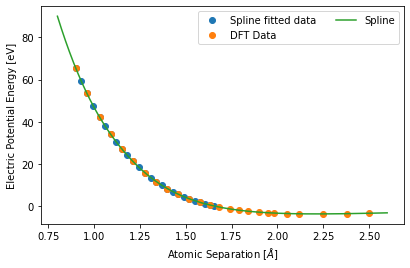

Number of points in the spline:  26


In [163]:

#Get the spline which extends from the largest positive V data point we have to 
#the zero point of the fitted spline
greater_than = vArray_sorted>0
zeroCrossing = cs.roots()[0]
dArray_greaterthan = dArray_sorted[greater_than]
dPoints_to_add = []
for n, i in enumerate(dArray_greaterthan[:-1]):
    distance = dArray_greaterthan[n+1] - i
    spacing = distance/2
    dPoints_to_add.append(i + spacing)
    #dPoints_to_add.append(i+2*spacing)
    
dPoints_to_add.append(zeroCrossing)
splineD_unsorted = np.copy(dArray_sorted[greater_than])
splineD_unsorted = np.append(splineD_unsorted, dPoints_to_add)
splineD = np.sort(splineD_unsorted)
splineV = cs(splineD)


#NOW PLOT EVERYTHING TO MAKE SURE IT LOOKS GOOD
#Si-Si mesh points: 0.8and 2.6
#Si-H mesh points: 0.6 and 1.6
#H-H mesh points: 0.25 and 0.8
finemesh = np.arange(0.8, 2.6, .001)

plt.figure(figsize=(6.5,4))
plt.plot(splineD, splineV ,'o',label='Spline fitted data')
plt.plot(dArray_sorted, vArray_sorted,'o',label='DFT Data')
plt.plot(finemesh, cs(finemesh),label='Spline')
plt.xlabel(r"Atomic Separation [${\AA}$]")
plt.ylabel("Electric Potential Energy [eV]")
plt.legend(loc='upper right',ncol=2)
plt.show()

#zeroSlopePoint = cs.derivative().roots()[1]
#print("Bonding point at: ",zeroSlopePoint)

print("Number of points in the spline: ", len(splineD))

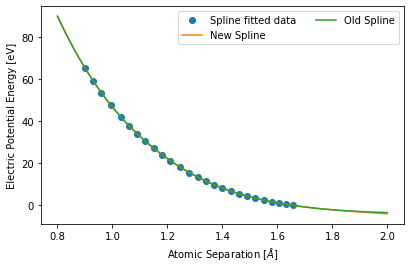

Bonding point of old spline at:  [2.21469562 2.99468205]
Bonding point of new spline at:  []
[0.89999911 0.92999908 0.95999905 0.99499901 1.02999898 1.05999895
 1.08999892 1.11999889 1.14999886 1.17999883 1.2099988  1.24499876
 1.27999873 1.3099987  1.33999867 1.36999864 1.39999861 1.42999858
 1.45999855 1.48999852 1.51999849 1.54999846 1.57999843 1.60499841
 1.62999838 1.65489564]
[6.53838288e+01 5.92224179e+01 5.35669226e+01 4.75635867e+01
 4.21500940e+01 3.79361782e+01 3.40654491e+01 3.04919716e+01
 2.71904525e+01 2.41410741e+01 2.13252791e+01 1.83142209e+01
 1.55861951e+01 1.34657094e+01 1.15405381e+01 9.80322917e+00
 8.23743665e+00 6.82587783e+00 5.55641713e+00 4.41798802e+00
 3.39865302e+00 2.48661712e+00 1.67152626e+00 1.05933488e+00
 5.02977757e-01 2.18466738e-16]


In [167]:
#Now as a check, make a spline from the new data, and make sure it aligns
cs_new = CubicSpline(splineD, splineV)
finemesh = np.arange(0.8,2.0,.001)
plt.figure(figsize=(6.5,4))
plt.plot(splineD, splineV ,'o',label='Spline fitted data')
plt.plot(finemesh, cs_new(finemesh),label='New Spline')
plt.plot(finemesh, cs(finemesh), label='Old Spline')
plt.xlabel(r"Atomic Separation [${\AA}$]")
plt.ylabel("Electric Potential Energy [eV]")
plt.legend(loc='upper right',ncol=2)
plt.show()

zeroSlopePoint_old = cs.derivative().roots()
print("Bonding point of old spline at: ",zeroSlopePoint_old)

zeroSlopePoint_new = cs_new.derivative().roots()
print("Bonding point of new spline at: ",zeroSlopePoint_new)

print(splineD)
print(splineV)

### Export the spline in a way that it can be plugged straight into the GLUE model

In [168]:
outputFilename = "/" + atom1 + "-" + atom2 + "_newspline.txt"
outputFile = cwd + outputFilename
g = open(outputFile,'w+')
for n, item in enumerate(splineD):
    locString = "\"" + str(item).rjust(4) + "\""
    eString = "\"" + str(splineV[n]) + "\""
    g.write("<point r=" + locString + " E=" + eString + "/>\n")
g.close()